# Monitoring Quickstart

In this notebook, we will cover the quickstart for monitoring service. By the end of this quickstart, we'll have a demo monitoring dashboard setup which can be accessed via a URL. 

So let's get started. 

### Step 1: Connect to TruEra

We can connect to TruEra using TruEra's URL: https://app.truera.net/

Connecting to TruEra will also require authentication. This is done using Authentication token. 

You can retrieve your auth token at this link:

https://app.truera.net/home/p?modal=workspaceSettings&selectedTab=authentication

Doing so will open a browser that may ask you to log in, and then display a pop-up window with a button named "Generate Credentials". Click that button.


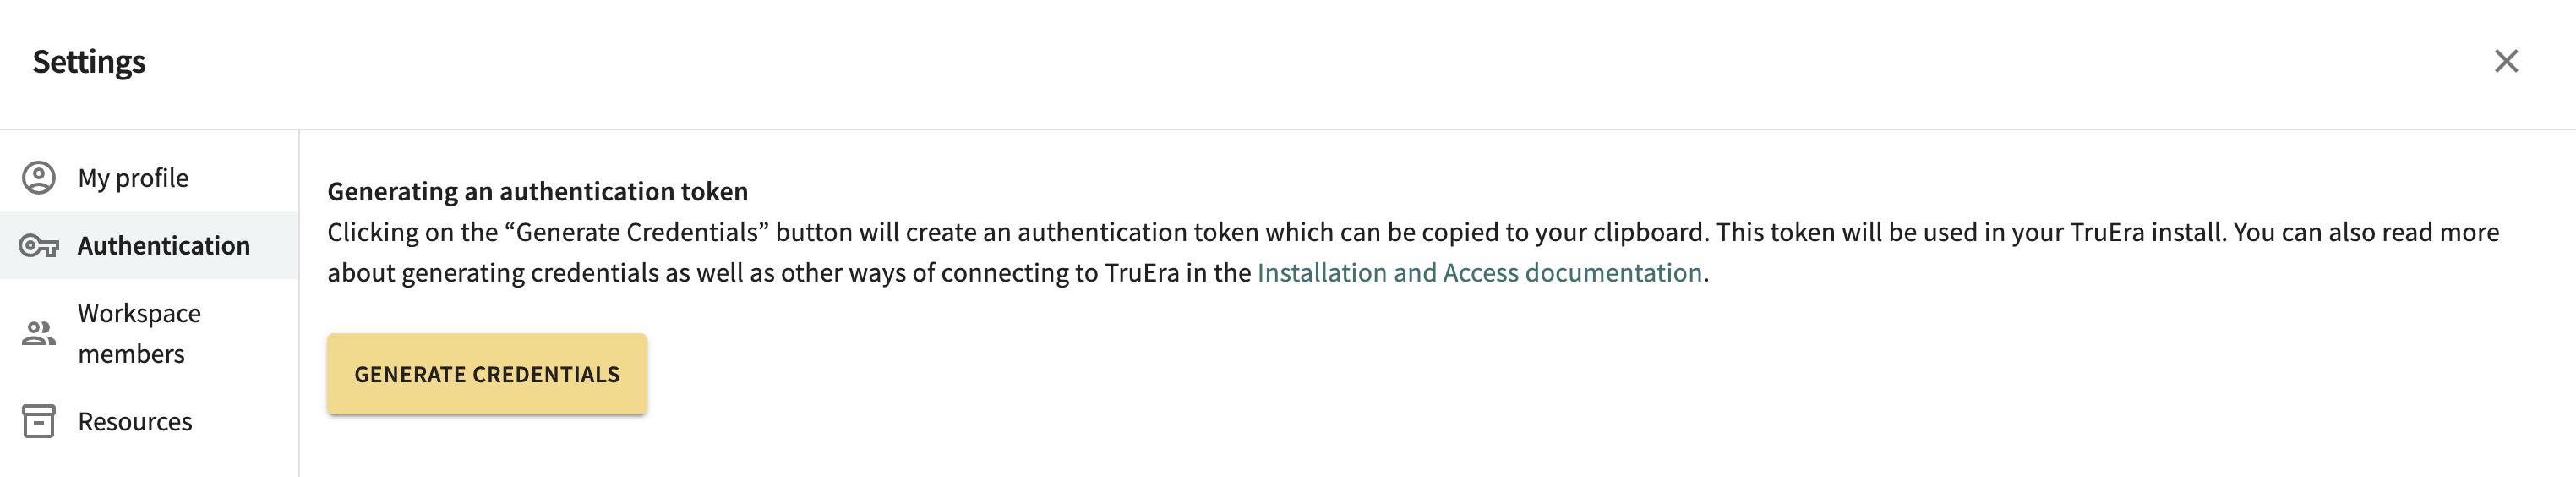

After clicking "Generate Credentials", you will get a pop-up with your authentication token. You can simply click the copy icon to add it to your clipboard. After you've done so, just add it to the cell below along with your TruEra URL.

In [19]:
# connection details
TRUERA_URL = "https://app.truera.net"
AUTH_TOKEN = "XXXX" # Replace with auth token as copied from TruEra

### Step 2: Install packages

#### Download the TruEra Python SDK

You can download the TruEra Python SDK via [PyPI](https://pypi.org/project/truera/) with pip install truera.

Alternatively, if you lack access to PyPI, you can download and install the TruEra Python package from app.truera.net. Ater signing in, execute the following steps in the TruEra Web App:

1. Click your avatar in the toolbar at the top-right of the browser window, then select Resources.

2. Click TruEra Python Package under TruEra Client Downloads and save the latest .whl package to your local machine.

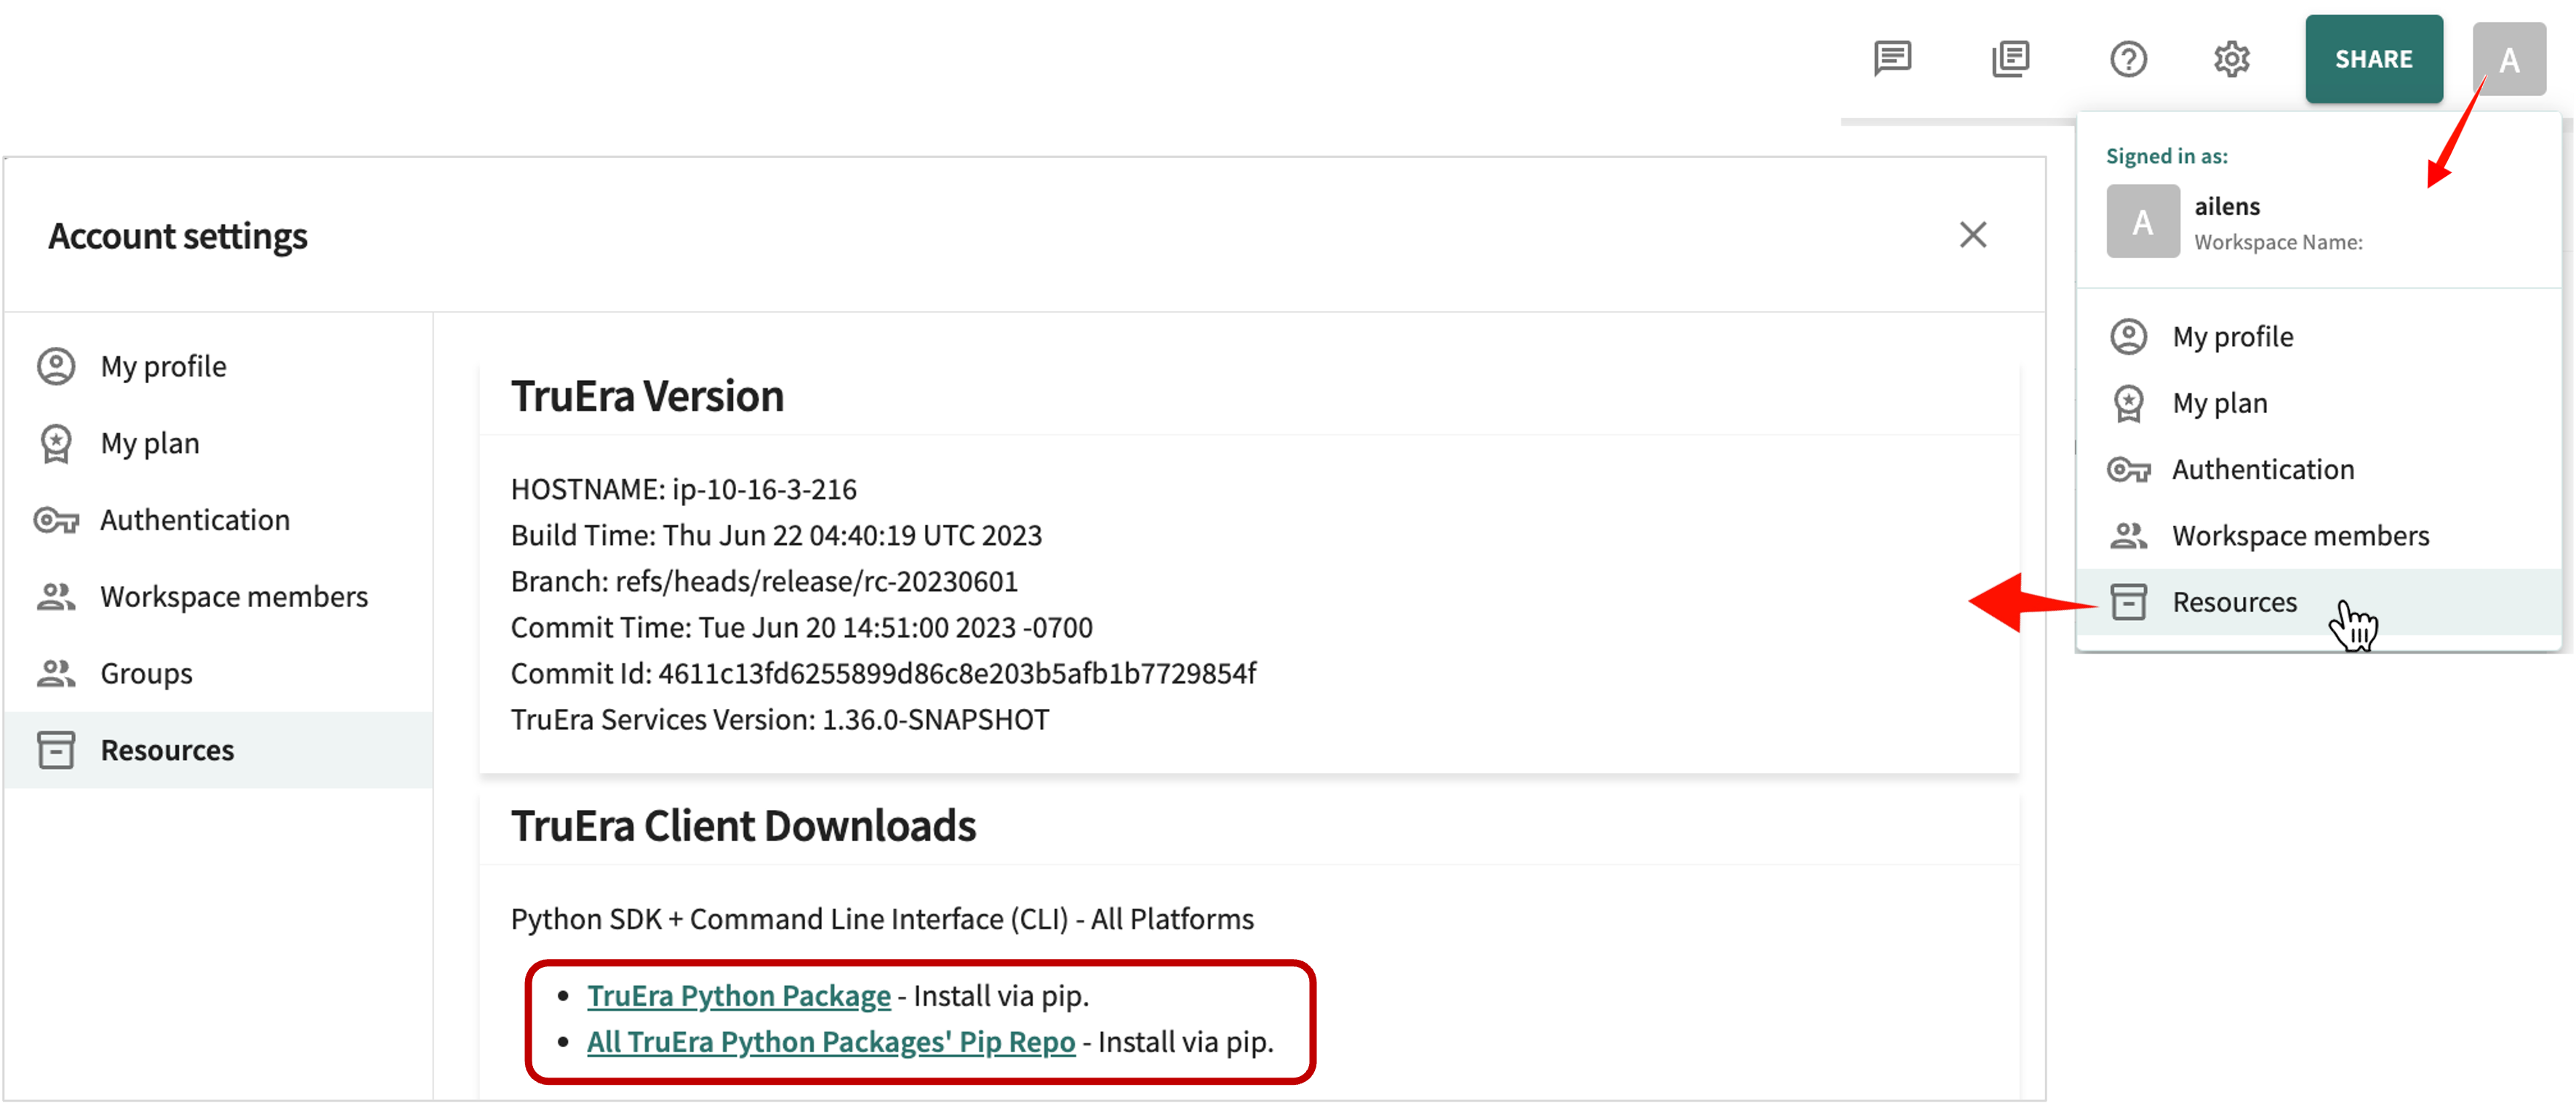

3. Open a command prompt and enter `pip install truera-*.whl`.

This automatically installs the TruEra Python Package in your Python environment and sets the tru executable in the $PATH of your environment.

#### Create TruEra Client

In [20]:
from truera.client.truera_workspace import TrueraWorkspace
from truera.client.truera_authentication import TokenAuthentication

auth = TokenAuthentication(TOKEN)
tru = TrueraWorkspace(TRUERA_URL, auth, ignore_version_mismatch=True)
tru.set_environment("remote")

ModuleNotFoundError: No module named 'truera'

### Step 3: Download sample data

//TODO(Saket): Where do we place the .parquet file? How we allow user to download the data

### Step 4: Create a project

In [ ]:
# adding project
project_name = "PROJECT_NAME" # Replace this with a project name of choice. 
if project_name not in tru.get_projects():
    tru.add_project(project=project_name, score_type="probits")
else:
    tru.set_project(project_name)

### Step 5: Add data collection and model 

In [ ]:
MODEL_NAME = "lr"


data_collection_name = "{}_dataset".format(MODEL_NAME)

# Add data collection.
if data_collection_name not in tru.get_data_collections():
    tru.add_data_collection(data_collection_name=data_collection_name)
else:
    tru.set_data_collection(data_collection_name)

# Add models.
if MODEL_NAME not in tru.get_models():
    tru.add_model(MODEL_NAME)
else:
    tru.set_model(MODEL_NAME)

### Step 6: Add production data

In [18]:
from truera.scripts.ingestion.util import columns_excluding


# common parameters & constants
_ID_COLUMN_NAME = 'id'
_TIMESTAMP_COLUMN_NAME = 'timestamp'
_GENDER_COLUMN_NAME = 'gender'
_LABEL_COLUMN_NAME = 'readmission'
_PREDICTION_COLUMN_NAME = 'prediction'
_PREDICTION_CLASSIFICATION_COLUMN_NAME = 'prediction_classification'
_PREDICTION_THRESHOLD = 0.6
_TAGS_COLUMN_NAME = 'tags'
_TAGS_VALUE_PREFIX = 'T'

def add_prediction_classification_column(data: pd.DataFrame, threshold):
    data[_PREDICTION_CLASSIFICATION_COLUMN_NAME] = ["1" if score > threshold else "0" for score in data[_PREDICTION_COLUMN_NAME] ]

pre_column_names = columns_excluding(
        train_data, [
            _ID_COLUMN_NAME, _GENDER_COLUMN_NAME, _TIMESTAMP_COLUMN_NAME,
            _PREDICTION_COLUMN_NAME, _LABEL_COLUMN_NAME, _TAGS_COLUMN_NAME
        ]
    )


#prod data
add_prediction_classification_column(prod_data, _PREDICTION_THRESHOLD)
    
# adding prod data with probits
tru.add_production_data(
    prod_data,
    column_spec=ColumnSpec(
        id_col_name=_ID_COLUMN_NAME,
        pre_data_col_names=pre_column_names,
        label_col_names=[_LABEL_COLUMN_NAME],
        extra_data_col_names=[_GENDER_COLUMN_NAME],
        prediction_col_names=[_PREDICTION_COLUMN_NAME],
        timestamp_col_name=_TIMESTAMP_COLUMN_NAME,
        tags_col_name= _TAGS_COLUMN_NAME
    ),
    model_output_context=ModelOutputContext(model_name,score_type="probits")
)

# adding classification_score
tru.add_production_data(
    prod_data,
    column_spec=ColumnSpec(
        id_col_name=_ID_COLUMN_NAME,
        prediction_col_names=[_PREDICTION_CLASSIFICATION_COLUMN_NAME],
        timestamp_col_name=_TIMESTAMP_COLUMN_NAME
    ),
    model_output_context=ModelOutputContext(model_name,score_type="classification")
)


ModuleNotFoundError: No module named 'truera'

### Step 7: Create dahsboard

You can head to URL: https://app.truera.net/home/monitoring to create the dashboard. [Add the ways to do this]